In [1]:
# Core Imports
import numpy as np
from utils.data import getClassifierData
from utils.reporter import ModelEvaluationHarness
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Implementation Specific Imports
from xgboost import XGBClassifier  as Classifier


In [2]:
preppedData, preppedTarget = getClassifierData()


accuracy :
 0.929030303030303
precision :
 0.9606071440179413
recall :
 0.8948738910588306
f1 :
 0.9265761670376524
classificationReport :
               precision    recall  f1-score   support

       False       0.90      0.96      0.93     32973
        True       0.96      0.89      0.93     33027

    accuracy                           0.93     66000
   macro avg       0.93      0.93      0.93     66000
weighted avg       0.93      0.93      0.93     66000

confusionMatrix :
 [[31761  1212]
 [ 3472 29555]]
roc_curve :
 {'fpr': array([0.        , 0.03675735, 1.        ]), 'tpr': array([0.        , 0.89487389, 1.        ]), 'thresholds': array([inf,  1.,  0.])}
auc :
 0.9290582720693117


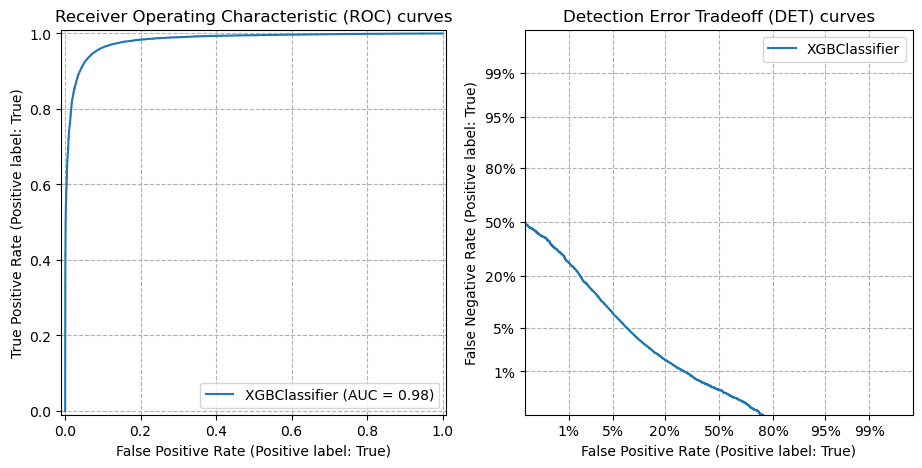

In [3]:
defaultModel = ModelEvaluationHarness(
    Classifier(),
    Classifier.__name__,
    preppedData,
    preppedTarget
    )

defaultModel.splitData()
defaultModel.train()
defaultModel.predict()
defaultModel.evaluate()
defaultModel.graphROC()
for valuation, value in defaultModel.evaluation.items():
    print(valuation ,':\n', value)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=10000. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/xgboost/core

accuracy :
 0.6286969696969696
precision :
 0.6440964588899787
recall :
 0.5766191298028885
f1 :
 0.6084928267885101
classificationReport :
               precision    recall  f1-score   support

       False       0.62      0.68      0.65     32973
        True       0.64      0.58      0.61     33027

    accuracy                           0.63     66000
   macro avg       0.63      0.63      0.63     66000
weighted avg       0.63      0.63      0.63     66000

confusionMatrix :
 [[22450 10523]
 [13983 19044]]
roc_curve :
 {'fpr': array([0.       , 0.3191399, 1.       ]), 'tpr': array([0.        , 0.57661913, 1.        ]), 'thresholds': array([inf,  1.,  0.])}
auc :
 0.6287396137292731


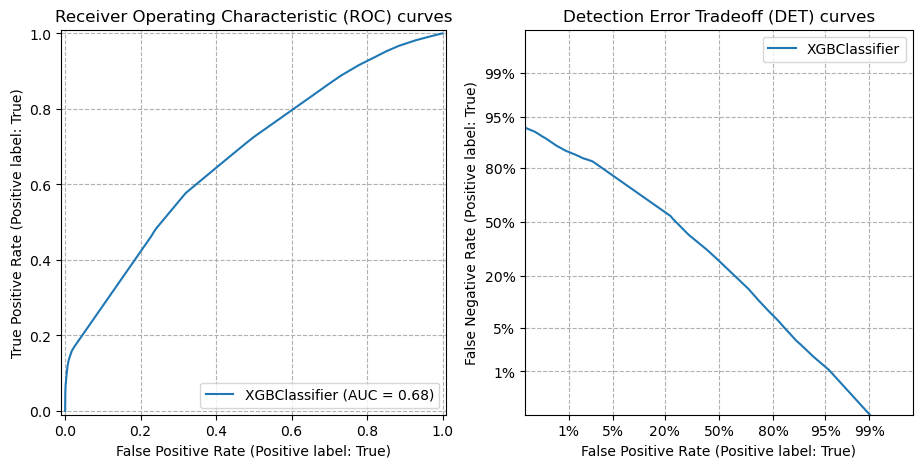

In [4]:
param_bounds = {
            'n_estimators': [None] + list(range(1,5)),
            'objective': [None, 'binary:logistic'],
            'booster': [None, 'gbtree', 'gblinear', 'dart']
        }

"""Identify Optimal Configuration"""
search = HalvingRandomSearchCV(Classifier(), param_bounds)
search = search.fit(preppedData, preppedTarget)


"""Harness Classifier with Optimal Configuration"""
tuned_evaluator = ModelEvaluationHarness(
    Classifier(**search.best_estimator_.get_params()),
    Classifier.__name__,
    preppedData,
    preppedTarget
)

"""Evaluate Model"""
tuned_evaluator.splitData()
tuned_evaluator.train()
tuned_evaluator.predict()
tuned_evaluator.evaluate()
tuned_evaluator.graphROC()
for valuation, value in tuned_evaluator.evaluation.items():
    print(valuation ,':\n', value)